In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Splitting the dataset into test set and training set
from sklearn.model_selection import train_test_split

# Feature Scaling- In practice it's seen that algos converge much faster if data is scaled properly
# standardization Scaling = (x- min(x))/ sd
# Normalization Scaling = (x- min(x))/ max(x) - min(x)
from sklearn.preprocessing import  StandardScaler


dataset = pd.read_csv('Position_Salaries.csv')

print dataset
# last column not included
X = dataset.iloc[:,1:2].values

# last column value ie output
Y = dataset.iloc[:,2:3].values


# dataset is small so no need to split otherwise training will not be good
"""
# random state is just for sake of course
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)"""

# no need to scale the data as LinearRegression/ mostly  libraries does it on it's own.

# Pretty printing of np arrays
np.set_printoptions(suppress=True)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [17]:
# Feature SCaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [23]:
# Fitting the SVR model to dataset

# Fun fact SVR is less common class and do not performs feature scaling on its own.
from sklearn.svm import SVR

# kernel : string, optional (default='rbf')
"""
Specifies the kernel type to be used in the algorithm.
It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
a callable.
If none is given, 'rbf' will be used. If a callable is given it is
used to precompute the kernel matrix."""

regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
# Predicting a new result with SVR

y_pred = regressor.predict(sc_X.transform(6.5))
print sc_Y.inverse_transform(y_pred)

[ 170370.0204065]


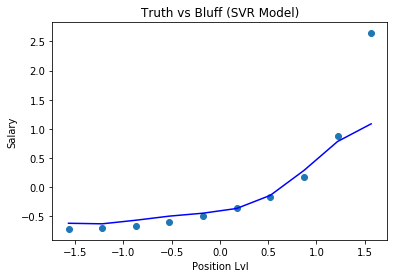

In [20]:
# Visualising the regression results

plt.figure(0)
plt.scatter(X,Y)
plt.plot(X,regressor.predict(X),'b')
plt.xlabel("Position Lvl")
plt.ylabel("Salary")
plt.title("Truth vs Bluff (SVR Model)")
plt.show()

In [ ]:
# The last point ie CEO is an outlier